<a href="https://colab.research.google.com/github/soumyakrath/IMTPDS2021/blob/main/GitHub-pwd/BigMartSales_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
options(warn=-1)

In [3]:
bigmart<-read.csv('https://raw.githubusercontent.com/soumyakrath/IMTPDS2021/main/GitHub-pwd/New_BigMart_updated.csv', sep=',',head= TRUE)

In [4]:
data(bigmart)

In [5]:
dim(bigmart)

[1] 8523   13

In [6]:
head(bigmart,3)

,X,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<int>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,1,FDA15,9.30,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,2,DRC01,5.92,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,3,FDN15,17.50,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [7]:
martsale = subset(bigmart, select = -c(1) )

In [8]:
dim(martsale)

[1] 8523   12

In [9]:
head(martsale,3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,FDA15,9.30,Low Fat,0.01604730,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,DRC01,5.92,Regular,0.01927822,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDN15,17.50,Low Fat,0.01676007,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [10]:
str(martsale)

'data.frame':	8523 obs. of  12 variables:
 $ Item_Identifier          : chr  "FDA15" "DRC01" "FDN15" "FDX07" ...
 $ Item_Weight              : num  9.3 5.92 17.5 19.2 8.93 ...
 $ Item_Fat_Content         : chr  "Low Fat" "Regular" "Low Fat" "Regular" ...
 $ Item_Visibility          : num  0.016 0.0193 0.0168 0 0 ...
 $ Item_Type                : chr  "Dairy" "Soft Drinks" "Meat" "Fruits and Vegetables" ...
 $ Item_MRP                 : num  249.8 48.3 141.6 182.1 53.9 ...
 $ Outlet_Identifier        : chr  "OUT049" "OUT018" "OUT049" "OUT010" ...
 $ Outlet_Establishment_Year: int  1999 2009 1999 1998 1987 2009 1987 1985 2002 2007 ...
 $ Outlet_Size              : chr  "Medium" "Medium" "Medium" "Medium" ...
 $ Outlet_Location_Type     : chr  "Tier 1" "Tier 3" "Tier 1" "Tier 3" ...
 $ Outlet_Type              : chr  "Supermarket Type1" "Supermarket Type2" "Supermarket Type1" "Grocery Store" ...
 $ Item_Outlet_Sales        : num  3735 443 2097 732 995 ...


In [11]:
summary(martsale)

 Item_Identifier     Item_Weight     Item_Fat_Content   Item_Visibility  
 Length:8523        Min.   : 4.555   Length:8523        Min.   :0.00000  
 Class :character   1st Qu.: 8.695   Class :character   1st Qu.:0.02699  
 Mode  :character   Median :12.600   Mode  :character   Median :0.05393  
                    Mean   :12.844                      Mean   :0.06613  
                    3rd Qu.:16.850                      3rd Qu.:0.09459  
                    Max.   :21.350                      Max.   :0.32839  
  Item_Type            Item_MRP      Outlet_Identifier 
 Length:8523        Min.   : 31.29   Length:8523       
 Class :character   1st Qu.: 93.83   Class :character  
 Mode  :character   Median :143.01   Mode  :character  
                    Mean   :140.99                     
                    3rd Qu.:185.64                     
                    Max.   :266.89                     
 Outlet_Establishment_Year Outlet_Size        Outlet_Location_Type
 Min.   :1985          

In [12]:
names(martsale)

[1] "Item_Identifier"           "Item_Weight"              
 [3] "Item_Fat_Content"          "Item_Visibility"          
 [5] "Item_Type"                 "Item_MRP"                 
 [7] "Outlet_Identifier"         "Outlet_Establishment_Year"
 [9] "Outlet_Size"               "Outlet_Location_Type"     
[11] "Outlet_Type"               "Item_Outlet_Sales"

In [13]:
unique(martsale$Item_Fat_Content)

[1] "Low Fat" "Regular" "low fat" "LF"      "reg"

In [14]:
martsale$Item_Fat_Content[martsale$Item_Fat_Content == "Low Fat"] <- "LowFat"

In [15]:
martsale$Item_Fat_Content[martsale$Item_Fat_Content == "low fat"] <- "LowFat"

In [16]:
martsale$Item_Fat_Content[martsale$Item_Fat_Content == "LF"] <- "LowFat"

In [17]:
martsale$Item_Fat_Content[martsale$Item_Fat_Content == "reg"] <- "Regular"

In [18]:
unique(martsale$Item_Fat_Content)

[1] "LowFat"  "Regular"

In [19]:
table(martsale$Item_Fat_Content)


 LowFat Regular 
   5517    3006 

In [20]:
unique(martsale$Item_Type)

[1] "Dairy"                 "Soft Drinks"           "Meat"                 
 [4] "Fruits and Vegetables" "Household"             "Baking Goods"         
 [7] "Snack Foods"           "Frozen Foods"          "Breakfast"            
[10] "Health and Hygiene"    "Hard Drinks"           "Canned"               
[13] "Breads"                "Starchy Foods"         "Others"               
[16] "Seafood"

In [21]:
martsale$Item_Type[martsale$Item_Type == "Soft Drinks"] <- "SoftDrinks"

In [22]:
martsale$Item_Type[martsale$Item_Type == "Fruits and Vegetables"] <- "Fruits_Vegetables"

In [23]:
martsale$Item_Type[martsale$Item_Type == "Baking Goods"] <- "BakingGoods"

In [24]:
martsale$Item_Type[martsale$Item_Type == "Snack Foods"] <- "SnackFoods"

In [25]:
martsale$Item_Type[martsale$Item_Type == "Frozen Foods"] <- "FrozenFoods"

In [26]:
martsale$Item_Type[martsale$Item_Type == "Health and Hygiene"] <- "Health_Hygiene"

In [27]:
martsale$Item_Type[martsale$Item_Type == "Hard Drinks"] <- "HardDrinks"

In [28]:
martsale$Item_Type[martsale$Item_Type == "Starchy Foods"] <- "StarchyFoods"

In [29]:
unique(martsale$Item_Type)

[1] "Dairy"             "SoftDrinks"        "Meat"             
 [4] "Fruits_Vegetables" "Household"         "BakingGoods"      
 [7] "SnackFoods"        "FrozenFoods"       "Breakfast"        
[10] "Health_Hygiene"    "HardDrinks"        "Canned"           
[13] "Breads"            "StarchyFoods"      "Others"           
[16] "Seafood"

In [30]:
unique(martsale$Outlet_Size)

[1] "Medium" "High"   "Small"

In [31]:
unique(martsale$Outlet_Location_Type)

[1] "Tier 1" "Tier 3" "Tier 2"

In [32]:
martsale$Outlet_Location_Type[martsale$Outlet_Location_Type == "Tier 1"] <- "Tier1"

In [33]:
martsale$Outlet_Location_Type[martsale$Outlet_Location_Type == "Tier 2"] <- "Tier2"

In [34]:
martsale$Outlet_Location_Type[martsale$Outlet_Location_Type == "Tier 3"] <- "Tier3"

In [35]:
unique(martsale$Outlet_Location_Type)

[1] "Tier1" "Tier3" "Tier2"

In [36]:
unique(martsale$Outlet_Type)

[1] "Supermarket Type1" "Supermarket Type2" "Grocery Store"    
[4] "Supermarket Type3"

In [37]:
martsale$Outlet_Type[martsale$Outlet_Type == "Supermarket Type1"] <- "SupermarketType1"

In [38]:
martsale$Outlet_Type[martsale$Outlet_Type == "Supermarket Type2"] <- "SupermarketType2"

In [39]:
martsale$Outlet_Type[martsale$Outlet_Type == "Supermarket Type3"] <- "SupermarketType3"

In [40]:
martsale$Outlet_Type[martsale$Outlet_Type == "Grocery Store"] <- "GroceryStore"

In [41]:
unique(martsale$Outlet_Type)

[1] "SupermarketType1" "SupermarketType2" "GroceryStore"     "SupermarketType3"

In [42]:
table(martsale$Outlet_Establishment_Year)


1985 1987 1997 1998 1999 2002 2004 2007 2009 
1463  932  930  555  930  929  930  926  928 

In [43]:
cor(martsale[, c(2,4,6)])

,Item_Weight,Item_Visibility,Item_MRP
Item_Weight,1.00000000,-0.022502012,0.020450948
Item_Visibility,-0.02250201,1.000000000,-0.001314848
Item_MRP,0.02045095,-0.001314848,1.000000000


In [44]:
install.packages('fastDummies')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [45]:
library('fastDummies')

In [46]:
martsale <- dummy_cols(martsale, select_columns = c('Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'),
             remove_selected_columns = TRUE)

In [47]:
head(martsale,3)

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LowFat,Item_Fat_Content_Regular,Item_Type_BakingGoods,⋯,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier1,Outlet_Location_Type_Tier2,Outlet_Location_Type_Tier3,Outlet_Type_GroceryStore,Outlet_Type_SupermarketType1,Outlet_Type_SupermarketType2,Outlet_Type_SupermarketType3
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,FDA15,9.30,0.01604730,249.8092,OUT049,1999,3735.1380,1,0,0,⋯,0,1,0,1,0,0,0,1,0,0
2,DRC01,5.92,0.01927822,48.2692,OUT018,2009,443.4228,0,1,0,⋯,0,1,0,0,0,1,0,0,1,0
3,FDN15,17.50,0.01676007,141.6180,OUT049,1999,2097.2700,1,0,0,⋯,0,1,0,1,0,0,0,1,0,0


In [48]:
martcorr = subset(martsale, select = -c(1,5,6,7) )

In [49]:
head(martcorr,3)

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LowFat,Item_Fat_Content_Regular,Item_Type_BakingGoods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,⋯,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier1,Outlet_Location_Type_Tier2,Outlet_Location_Type_Tier3,Outlet_Type_GroceryStore,Outlet_Type_SupermarketType1,Outlet_Type_SupermarketType2,Outlet_Type_SupermarketType3
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,9.30,0.01604730,249.8092,1,0,0,0,0,0,1,⋯,0,1,0,1,0,0,0,1,0,0
2,5.92,0.01927822,48.2692,0,1,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
3,17.50,0.01676007,141.6180,1,0,0,0,0,0,0,⋯,0,1,0,1,0,0,0,1,0,0


In [50]:
dim(martcorr)

[1] 8523   31

In [51]:
cor(martcorr[, 1:31])

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_LowFat,Item_Fat_Content_Regular,Item_Type_BakingGoods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,⋯,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier1,Outlet_Location_Type_Tier2,Outlet_Location_Type_Tier3,Outlet_Type_GroceryStore,Outlet_Type_SupermarketType1,Outlet_Type_SupermarketType2,Outlet_Type_SupermarketType3
Item_Weight,1.0000000000,-0.0225020119,0.0204509483,0.0161127046,-0.0161127046,-0.0356576224,-0.0503780247,-1.785101e-03,-0.029211120,0.030212522,⋯,0.0121950380,-0.0080031382,2.157005e-04,0.004823609,-0.0113749710,0.0064880966,0.002673599,0.0014911152,2.172528e-03,-7.283733e-03
Item_Visibility,-0.0225020119,1.0000000000,-0.0013148480,-0.0473143585,0.0473143585,0.0168865084,0.0004155035,4.341814e-02,0.011113712,0.035983880,⋯,-0.0419369097,-0.0316423019,6.350160e-02,0.061345887,-0.0687866372,0.0096498121,0.286399614,-0.1442485582,-3.467086e-02,-5.114446e-02
Item_MRP,0.0204509483,-0.0013148480,1.0000000000,-0.0060628994,0.0060628994,-0.0673106273,-0.0001122104,1.460497e-03,-0.005665916,0.035550927,⋯,0.0024375785,-0.0105784776,9.792769e-03,-0.001229086,0.0019513073,-0.0007437168,-0.004277135,0.0048854837,3.849921e-03,-6.713699e-03
Item_Fat_Content_LowFat,0.0161127046,-0.0473143585,-0.0060628994,1.0000000000,-1.0000000000,-0.0838044124,-0.0326427885,-6.571074e-02,-0.073234593,-0.021235509,⋯,0.0021320419,-0.0034946053,2.313039e-03,-0.003154879,0.0032717388,-0.0002410231,0.002924297,-0.0005332351,-2.129410e-03,-1.825365e-04
Item_Fat_Content_Regular,-0.0161127046,0.0473143585,0.0060628994,-1.0000000000,1.0000000000,0.0838044124,0.0326427885,6.571074e-02,0.073234593,0.021235509,⋯,-0.0021320419,0.0034946053,-2.313039e-03,0.003154879,-0.0032717388,0.0002410231,-0.002924297,0.0005332351,2.129410e-03,1.825365e-04
Item_Type_BakingGoods,-0.0356576224,0.0168865084,-0.0673106273,-0.0838044124,0.0838044124,1.0000000000,-0.0499682132,-3.280070e-02,-0.082354411,-0.084599673,⋯,0.0030361696,-0.0068826901,5.363712e-03,0.003392264,-0.0007006356,-0.0024462280,0.003535552,0.0018459019,-3.631677e-03,-2.957106e-03
Item_Type_Breads,-0.0503780247,0.0004155035,-0.0001122104,-0.0326427885,0.0326427885,-0.0499682132,1.0000000000,-1.991831e-02,-0.050009929,-0.051373370,⋯,-0.0054419214,0.0025233870,1.041654e-03,-0.005139733,0.0029334224,0.0019088408,0.002304542,-0.0061888997,-7.337742e-04,7.693473e-03
Item_Type_Breakfast,-0.0017851015,0.0434181363,0.0014604974,-0.0657107355,0.0657107355,-0.0328007006,-0.0199183104,1.000000e+00,-0.032828084,-0.033723090,⋯,0.0032355539,-0.0003223927,-1.898370e-03,0.005045754,-0.0087408876,0.0037543781,0.015676255,-0.0086953702,7.674435e-05,-3.550234e-03
Item_Type_Canned,-0.0292111202,0.0111137121,-0.0056659157,-0.0732345931,0.0732345931,-0.0823544109,-0.0500099294,-3.282808e-02,1.000000000,-0.084670301,⋯,-0.0084607691,-0.0010815913,7.053984e-03,-0.004766336,0.0093662956,-0.0046118591,-0.012574427,0.0012359516,1.041777e-02,1.136135e-03
Item_Type_Dairy,0.0302125218,0.0359838803,0.0355509268,-0.0212355087,0.0212355087,-0.0845996726,-0.0513733703,-3.372309e-02,-0.084670301,1.000000000,⋯,0.0075137543,-0.0109408718,6.658755e-03,0.013399194,-0.0081616308,-0.0044824898,0.006933112,0.0033964395,-1.745651e-03,-1.081723e-02


In [52]:
names(martcorr)

[1] "Item_Weight"                  "Item_Visibility"             
 [3] "Item_MRP"                     "Item_Fat_Content_LowFat"     
 [5] "Item_Fat_Content_Regular"     "Item_Type_BakingGoods"       
 [7] "Item_Type_Breads"             "Item_Type_Breakfast"         
 [9] "Item_Type_Canned"             "Item_Type_Dairy"             
[11] "Item_Type_FrozenFoods"        "Item_Type_Fruits_Vegetables" 
[13] "Item_Type_HardDrinks"         "Item_Type_Health_Hygiene"    
[15] "Item_Type_Household"          "Item_Type_Meat"              
[17] "Item_Type_Others"             "Item_Type_Seafood"           
[19] "Item_Type_SnackFoods"         "Item_Type_SoftDrinks"        
[21] "Item_Type_StarchyFoods"       "Outlet_Size_High"            
[23] "Outlet_Size_Medium"           "Outlet_Size_Small"           
[25] "Outlet_Location_Type_Tier1"   "Outlet_Location_Type_Tier2"  
[27] "Outlet_Location_Type_Tier3"   "Outlet_Type_GroceryStore"    
[29] "Outlet_Type_SupermarketType1" "Outlet_Type_SupermarketType2"
[31] "Outlet_Type_SupermarketType3"

In [53]:
model=lm(Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP+Item_Fat_Content_LowFat+Item_Fat_Content_Regular+Item_Type_BakingGoods+
Item_Type_Breads+Item_Type_Breakfast+Item_Type_Canned+Item_Type_Dairy+Item_Type_FrozenFoods+Item_Type_Fruits_Vegetables+Item_Type_HardDrinks+
Item_Type_Health_Hygiene+Item_Type_Household+Item_Type_Meat+Item_Type_Others+Item_Type_Seafood+Item_Type_SnackFoods+Item_Type_SoftDrinks+
Item_Type_StarchyFoods+Outlet_Size_High+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier1+Outlet_Location_Type_Tier2+
Outlet_Location_Type_Tier3+Outlet_Type_GroceryStore+Outlet_Type_SupermarketType1+Outlet_Type_SupermarketType2+Outlet_Type_SupermarketType3, data=martsale)

In [54]:
print(model)


Call:
lm(formula = Item_Outlet_Sales ~ Item_Weight + Item_Visibility + 
    Item_MRP + Item_Fat_Content_LowFat + Item_Fat_Content_Regular + 
    Item_Type_BakingGoods + Item_Type_Breads + Item_Type_Breakfast + 
    Item_Type_Canned + Item_Type_Dairy + Item_Type_FrozenFoods + 
    Item_Type_Fruits_Vegetables + Item_Type_HardDrinks + Item_Type_Health_Hygiene + 
    Item_Type_Household + Item_Type_Meat + Item_Type_Others + 
    Item_Type_Seafood + Item_Type_SnackFoods + Item_Type_SoftDrinks + 
    Item_Type_StarchyFoods + Outlet_Size_High + Outlet_Size_Medium + 
    Outlet_Size_Small + Outlet_Location_Type_Tier1 + Outlet_Location_Type_Tier2 + 
    Outlet_Location_Type_Tier3 + Outlet_Type_GroceryStore + Outlet_Type_SupermarketType1 + 
    Outlet_Type_SupermarketType2 + Outlet_Type_SupermarketType3, 
    data = martsale)

Coefficients:
                 (Intercept)                   Item_Weight  
                   1626.5841                       -0.2862  
             Item_Visibility      

In [55]:
summary(model)


Call:
lm(formula = Item_Outlet_Sales ~ Item_Weight + Item_Visibility + 
    Item_MRP + Item_Fat_Content_LowFat + Item_Fat_Content_Regular + 
    Item_Type_BakingGoods + Item_Type_Breads + Item_Type_Breakfast + 
    Item_Type_Canned + Item_Type_Dairy + Item_Type_FrozenFoods + 
    Item_Type_Fruits_Vegetables + Item_Type_HardDrinks + Item_Type_Health_Hygiene + 
    Item_Type_Household + Item_Type_Meat + Item_Type_Others + 
    Item_Type_Seafood + Item_Type_SnackFoods + Item_Type_SoftDrinks + 
    Item_Type_StarchyFoods + Outlet_Size_High + Outlet_Size_Medium + 
    Outlet_Size_Small + Outlet_Location_Type_Tier1 + Outlet_Location_Type_Tier2 + 
    Outlet_Location_Type_Tier3 + Outlet_Type_GroceryStore + Outlet_Type_SupermarketType1 + 
    Outlet_Type_SupermarketType2 + Outlet_Type_SupermarketType3, 
    data = martsale)

Residuals:
    Min      1Q  Median      3Q     Max 
-4333.2  -673.8   -87.0   573.1  7944.5 

Coefficients: (5 not defined because of singularities)
                     

In [56]:
pred<-predict(model, newdata = martsale, interval = "prediction")
pred

,fit,lwr,upr
1,3954.3860,1735.7686,6173.003
2,560.9145,-1659.2602,2781.089
3,2309.7980,90.4314,4529.165
4,1073.1224,-1146.2402,3292.485
5,907.9457,-1310.4990,3126.390
6,640.5774,-1578.4082,2859.563
7,1032.2778,-1185.9322,3250.488
8,3155.8205,937.8440,5373.797
9,1643.9325,-573.7596,3861.625
10,3033.6261,815.7796,5251.473


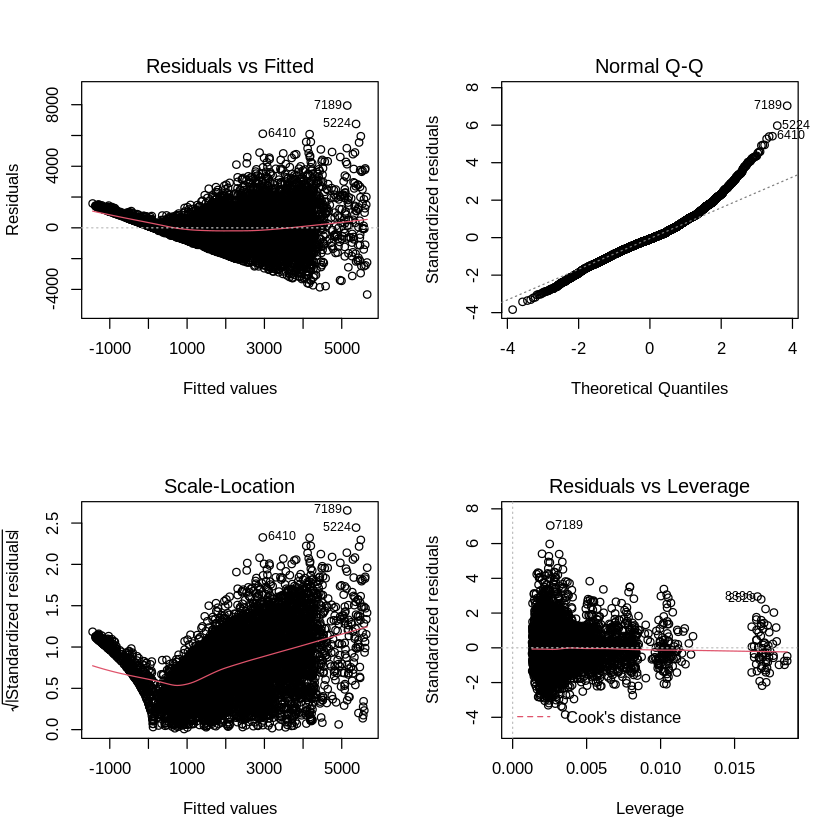

In [57]:
par(mfrow = c(2, 2))
plot(model)

In [58]:
# Split the sample data into training and evaluation set(80:20) and make the model
set.seed(1)
row.number <- sample(1:nrow(martsale), 0.8*nrow(martsale))
train = martsale[row.number,]
test = martsale[-row.number,]
dim(train)
dim(test)

[1] 6818   35

[1] 1705   35

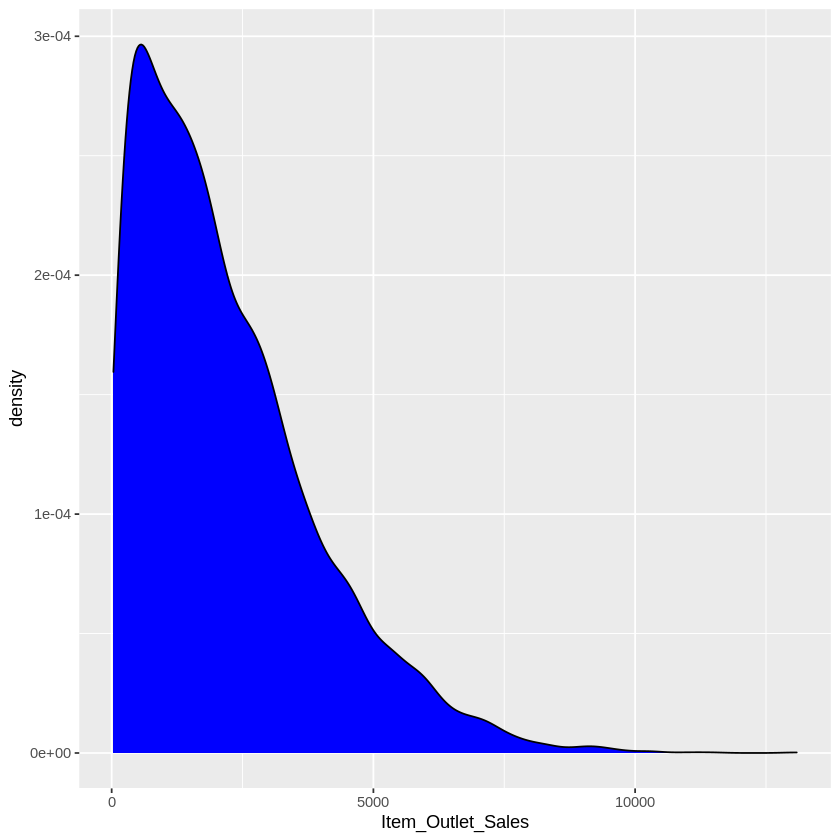

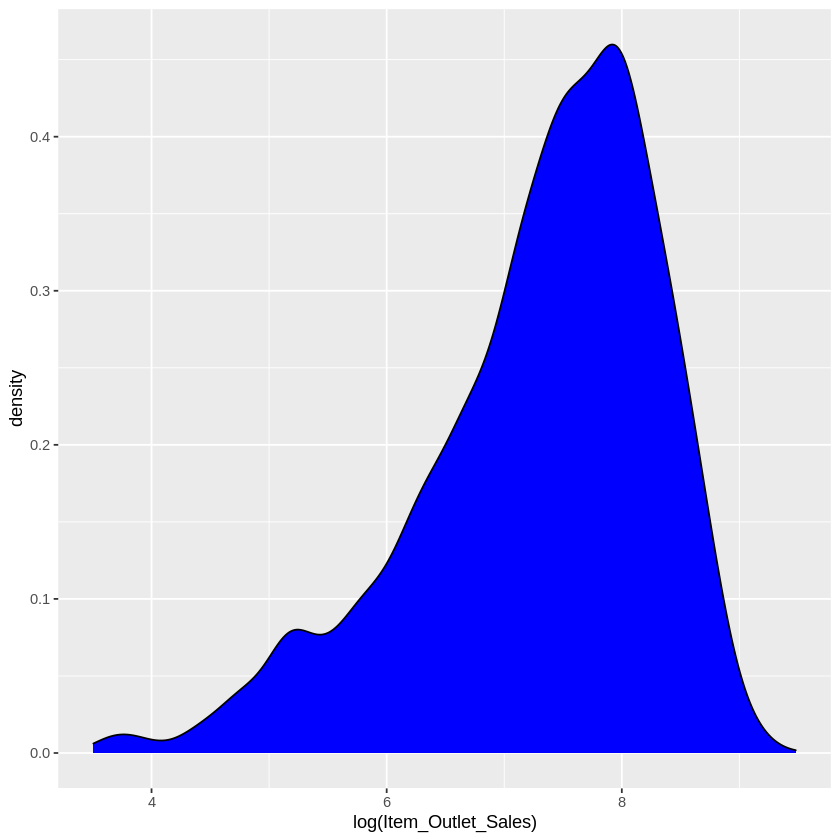

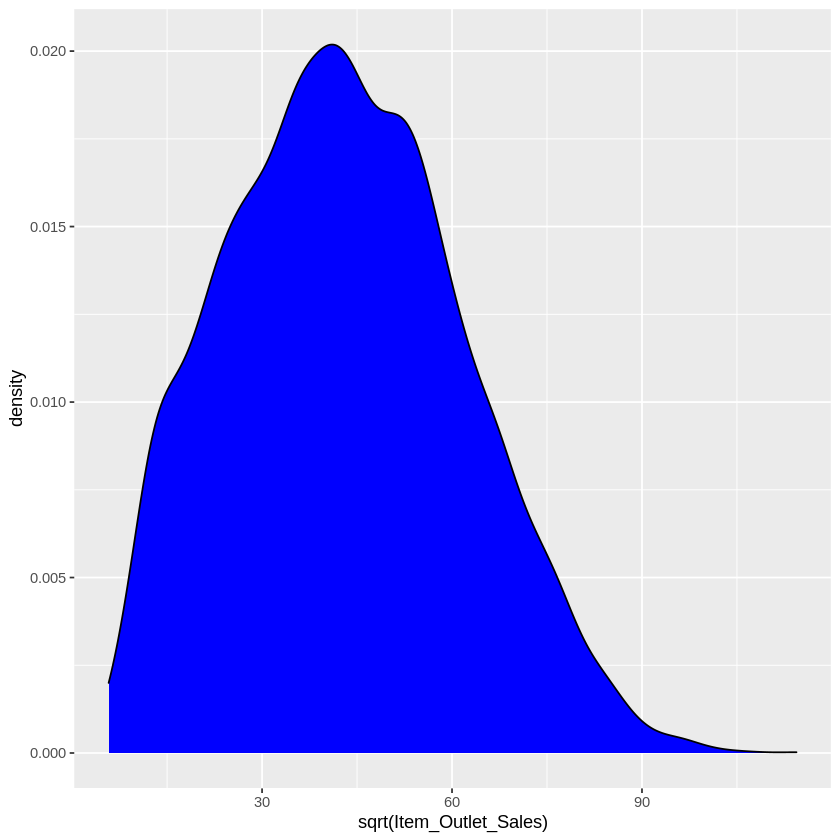

In [59]:
# Explore the data to check normal distribution in different forms 
# original, log transformation and square root transformation

ggplot(train, aes(Item_Outlet_Sales)) + geom_density(fill="blue")
ggplot(train, aes(log(Item_Outlet_Sales))) + geom_density(fill="blue")
ggplot(train, aes(sqrt(Item_Outlet_Sales))) + geom_density(fill="blue")


Call:
lm(formula = log(Item_Outlet_Sales) ~ Item_Weight + Item_Visibility + 
    Item_MRP + Item_Fat_Content_LowFat + Item_Fat_Content_Regular + 
    Item_Type_BakingGoods + Item_Type_Breads + Item_Type_Breakfast + 
    Item_Type_Canned + Item_Type_Dairy + Item_Type_FrozenFoods + 
    Item_Type_Fruits_Vegetables + Item_Type_HardDrinks + Item_Type_Health_Hygiene + 
    Item_Type_Household + Item_Type_Meat + Item_Type_Others + 
    Item_Type_Seafood + Item_Type_SnackFoods + Item_Type_SoftDrinks + 
    Item_Type_StarchyFoods + Outlet_Size_High + Outlet_Size_Medium + 
    Outlet_Size_Small + Outlet_Location_Type_Tier1 + Outlet_Location_Type_Tier2 + 
    Outlet_Location_Type_Tier3 + Outlet_Type_GroceryStore + Outlet_Type_SupermarketType1 + 
    Outlet_Type_SupermarketType2 + Outlet_Type_SupermarketType3, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.28795 -0.29605  0.06992  0.37592  1.35907 

Coefficients: (5 not defined because of singularities)
         

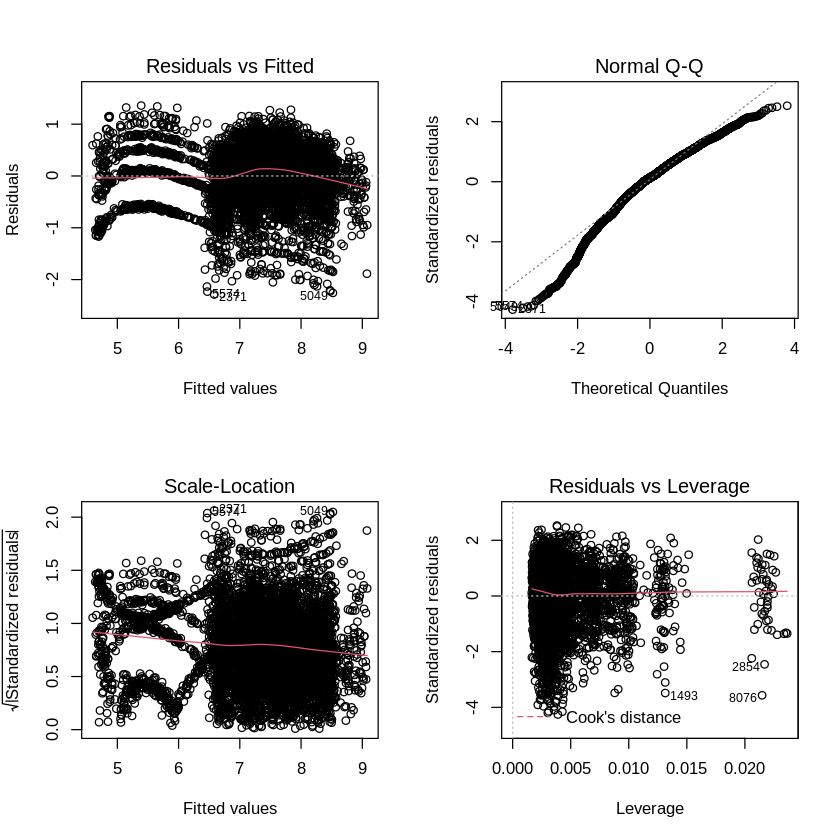

In [60]:
# We can see that both ‘log’ and ‘sqrt’ does a decent job to transform ‘Item_Outlet_Sales’ distribution closer to normal.
# selected ‘log’ transformation model

model = lm(log(Item_Outlet_Sales)~Item_Weight+Item_Visibility+Item_MRP+Item_Fat_Content_LowFat+Item_Fat_Content_Regular+Item_Type_BakingGoods+
Item_Type_Breads+Item_Type_Breakfast+Item_Type_Canned+Item_Type_Dairy+Item_Type_FrozenFoods+Item_Type_Fruits_Vegetables+Item_Type_HardDrinks+
Item_Type_Health_Hygiene+Item_Type_Household+Item_Type_Meat+Item_Type_Others+Item_Type_Seafood+Item_Type_SnackFoods+Item_Type_SoftDrinks+
Item_Type_StarchyFoods+Outlet_Size_High+Outlet_Size_Medium+Outlet_Size_Small+Outlet_Location_Type_Tier1+Outlet_Location_Type_Tier2+
Outlet_Location_Type_Tier3+Outlet_Type_GroceryStore+Outlet_Type_SupermarketType1+Outlet_Type_SupermarketType2+Outlet_Type_SupermarketType3, data=train)
summary(model)
par(mfrow=c(2,2))
plot(model)

#### Multiple R-squared:  0.7223

In [61]:
# Prediction with test data
pred <- predict(model, newdata = test)
rmse <- sqrt(sum((exp(pred) - test$Item_Outlet_Sales)^2)/length(test$Item_Outlet_Sales))
c(RMSE = rmse, R2=summary(model)$r.squared)

RMSE           R2 
1100.8774562    0.7222855

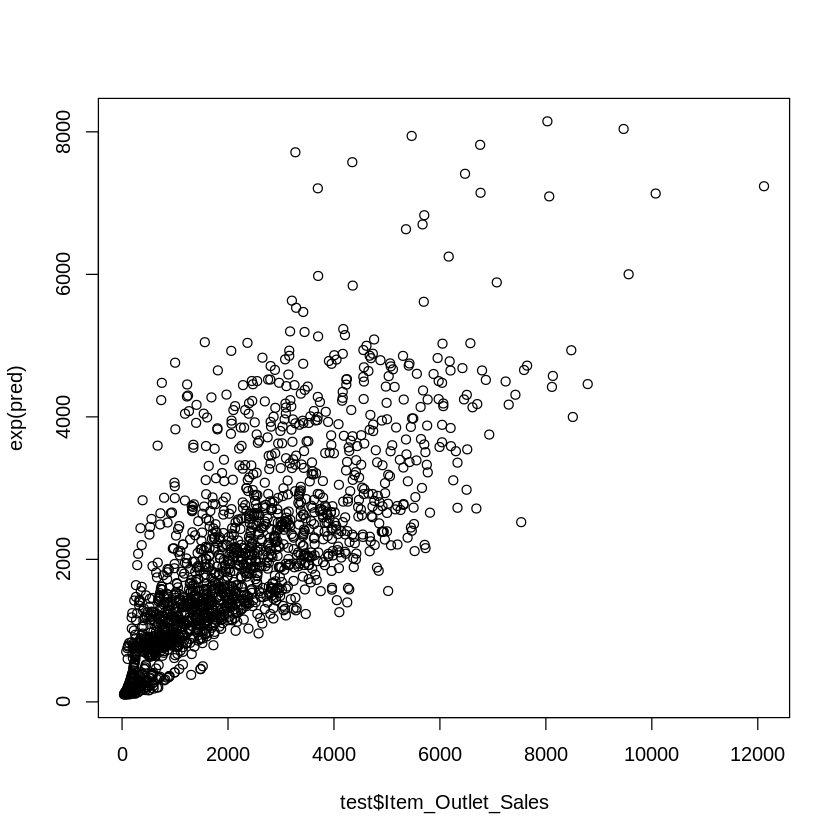

In [62]:
par(mfrow=c(1,1))
plot(test$Item_Outlet_Sales, exp(pred))